In [46]:
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [47]:
train = pd.read_csv("train_qnU1GcL.csv")

In [48]:
train= train.drop('sourcing_channel',axis=1)

In [49]:
test = pd.read_csv("test_LxCaReE_DvdCKVT2_7rMflxW_O46whsi_lVTFXAY_pNfwkkx.csv")

In [50]:
train.head()

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0  110936                             0.429        12058  355060   
1   41492                             0.010        21546  315150   
2   31300                             0.917        17531   84140   
3   19415                             0.049        15341  250510   
4   99379                             0.052        31400  198680   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    2.0                     3.0   
3                    0.0                     0.0   
4                    0.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.02   
1                             0.0                           99.89   
2                             1.0                           98.69   
3                             0.0                           99.57   
4                             0.0                           99.87   

   no_of_premiums_paid residence_area_type  target  
0                   13               Urban       1  
1                   21               Urban       1  
2                    7               Rural       0  
3                    9               Urban       1  
4                   12               Urban       1

In [51]:
test.head()

id  perc_premium_paid_by_cash_credit  age_in_days  Income  \
0    649                             0.001        27384   51150   
1  81136                             0.124        23735  285140   
2  70762                             1.000        17170  186030   
3  53935                             0.198        16068  123540   
4  15476                             0.041        10591  200020   

   Count_3-6_months_late  Count_6-12_months_late  \
0                    0.0                     0.0   
1                    0.0                     0.0   
2                    0.0                     0.0   
3                    0.0                     0.0   
4                    1.0                     0.0   

   Count_more_than_12_months_late  application_underwriting_score  \
0                             0.0                           99.89   
1                             0.0                           98.93   
2                             0.0                             NaN   
3                             0.0                           99.00   
4                             0.0                           99.17   

   no_of_premiums_paid sourcing_channel residence_area_type  
0                    7                A               Rural  
1                   19                A               Urban  
2                    2                B               Urban  
3                   11                B               Rural  
4                   14                A               Rural

In [52]:
train.shape

(79853, 11)

In [53]:
test.shape

(34224, 11)

In [54]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'residence_area_type', 'target'],
      dtype='object')

In [55]:
test.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type'],
      dtype='object')

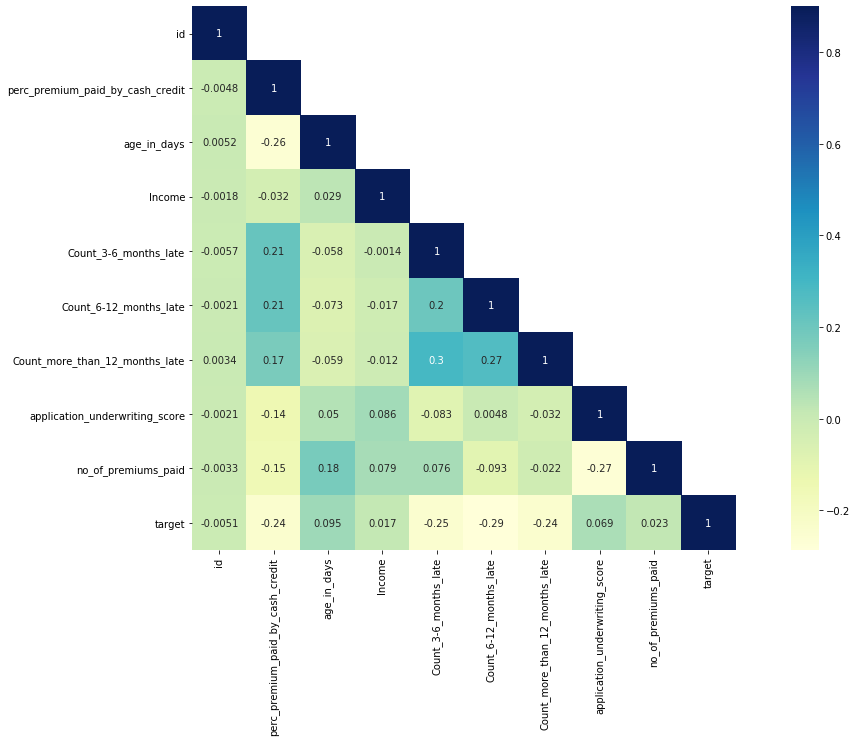

In [56]:
corr = train[['id','perc_premium_paid_by_cash_credit', 'age_in_days', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'target']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [57]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
residence_area_type                  object
target                                int64
dtype: object

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

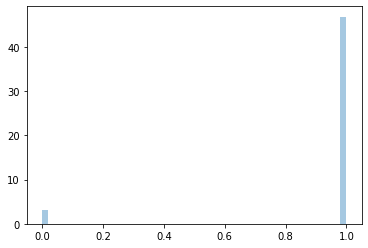

In [58]:

sn.distplot(train["target"])

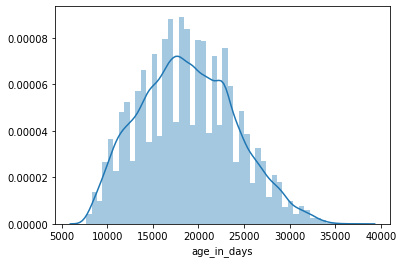

In [59]:
sn.distplot(train["age_in_days"])

In [60]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
residence_area_type                    0
target                                 0
dtype: int64

In [61]:
train.fillna(0,inplace=True)

In [62]:
train.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
residence_area_type                 0
target                              0
dtype: int64

In [63]:
test.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 31
Count_6-12_months_late                31
Count_more_than_12_months_late        31
application_underwriting_score      1323
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
dtype: int64

In [64]:
test.fillna(0,inplace=True)

In [65]:
test.isnull().sum()

id                                  0
perc_premium_paid_by_cash_credit    0
age_in_days                         0
Income                              0
Count_3-6_months_late               0
Count_6-12_months_late              0
Count_more_than_12_months_late      0
application_underwriting_score      0
no_of_premiums_paid                 0
sourcing_channel                    0
residence_area_type                 0
dtype: int64

In [66]:
from sklearn.linear_model import LogisticRegression

In [67]:
lModel = LogisticRegression()

In [68]:
X_train =train[train['age_in_days']<=28000]
validation = train[train['age_in_days']>28000]

In [69]:
X_train = train.drop('target',1)
y_train = train['target']
X_val = validation.drop('target',1)
y_val = validation['target']

In [70]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((79853, 10), (79853,), (3927, 10), (3927,))

In [71]:
X_train=pd.get_dummies(X_train)
X_val=pd.get_dummies(X_val)

In [72]:
lModel.fit(X_train,y_train)

C:\Users\Prajapati\Downloads\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
prediction = lModel.predict(X_val)

In [74]:
prediction.shape

(3927,)

In [75]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [76]:
rmsle(y_val,prediction)

0.1043494138107556

In [77]:
lModel.score(X_train,y_train)

0.937409990858202

In [78]:
from sklearn.tree import DecisionTreeRegressor

In [79]:
dt_reg = DecisionTreeRegressor(max_depth=7,min_samples_leaf=4)

In [80]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=7, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [81]:
predict = dt_reg.predict(X_val)

In [82]:
rmsle(y_val, predict)

0.09292397766396039

In [83]:
test=test.drop('sourcing_channel',1)

In [86]:
test_prediction = dt_reg.predict(test)

In [85]:
test=pd.get_dummies(test)

In [87]:
p1 = pd.DataFrame()

In [88]:
p1['target'] = test_prediction

In [89]:
p1.to_csv('p1.csv', header=True, index=False)

In [90]:
dt_reg.score(X_train, y_train)

0.19554918962662993